In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving RELIANCE.xlsx to RELIANCE (6).xlsx


In [ ]:
import io
rel = pd.read_excel(io.BytesIO(uploaded['RELIANCE.xlsx']))
rel = rel.set_index("Date")
rel = rel[['Open','Close']]
rel

,Open,Close
Date,,
2021-08-09,2081.000000,2077.149902
2021-08-10,2082.000000,2088.050049
2021-08-11,2096.949951,2117.300049
2021-08-12,2124.899902,2110.500000
2021-08-13,2117.300049,2145.649902
...,...,...
2022-02-02,2407.000000,2383.550049
2022-02-03,2392.000000,2352.750000
2022-02-04,2341.000000,2331.300049


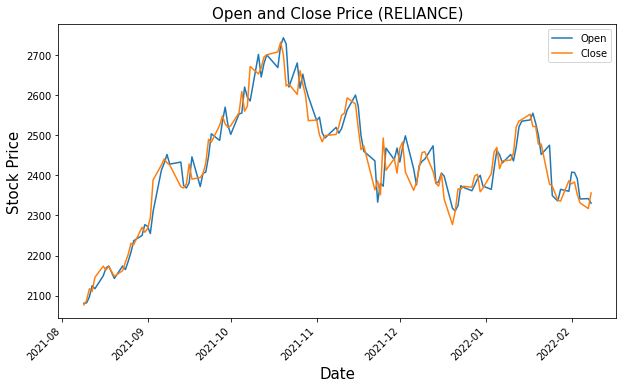

In [ ]:
rel[['Open','Close']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Open and Close Price (RELIANCE)',size=15)
plt.show()

Text(0.5, 1.0, 'Open Price (RELIANCE)')

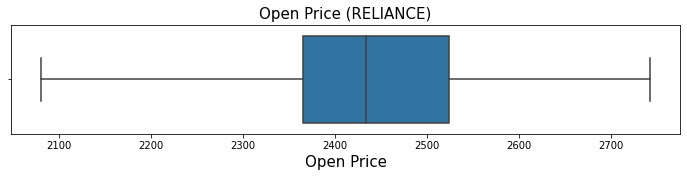

In [ ]:
fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=rel['Open'],whis=3.5)
plt.xlabel('Open Price',size=15)
plt.title('Open Price (RELIANCE)',size=15)

Text(0.5, 1.0, 'Close Price (RELIANCE)')

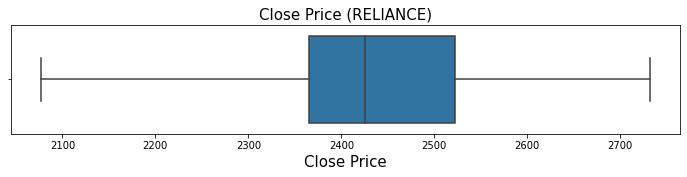

In [ ]:
fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=rel['Close'],whis=3.5)
plt.xlabel('Close Price',size=15)
plt.title('Close Price (RELIANCE)',size=15)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
rel[rel.columns] = Ms.fit_transform(rel)

In [ ]:
training_size = round(len(rel) * 0.70)
train_data = rel[:training_size]
test_data  = rel[training_size:]
train_data.shape, test_data.shape

((88, 2), (38, 2))

In [ ]:
def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(10,len(dataset)): # Selecting 10 rows at a time
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

In [ ]:
train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)

In [ ]:
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((78, 10, 2), (78, 2), (28, 10, 2), (28, 2))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [ ]:
model = Sequential()
model.add(Bidirectional(LSTM(units=100, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2]))))

model.add(Dropout(0.1)) 
model.add(Bidirectional(LSTM(units=100)))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
model.build(input_shape = (32,train_seq.shape[1], train_seq.shape[2]))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (32, 10, 200)            82400     
 l)                                                              
                                                                 
 dropout (Dropout)           (32, 10, 200)             0         
                                                                 
 bidirectional_1 (Bidirectio  (32, 200)                240800    
 nal)                                                            
                                                                 
 dense (Dense)               (32, 2)                   402       
                                                                 
Total params: 323,602
Trainable params: 323,602
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(train_seq, train_label, epochs=150,validation_data=(test_seq, test_label), verbose=1)

Epoch 1/150
3/3 [==============================] - 12s 660ms/step - loss: 0.2728 - mean_absolute_error: 0.4807 - val_loss: 0.0158 - val_mean_absolute_error: 0.1073
Epoch 2/150
3/3 [==============================] - 0s 34ms/step - loss: 0.0278 - mean_absolute_error: 0.1339 - val_loss: 0.0772 - val_mean_absolute_error: 0.2480
Epoch 3/150
3/3 [==============================] - 0s 35ms/step - loss: 0.0572 - mean_absolute_error: 0.1955 - val_loss: 0.0152 - val_mean_absolute_error: 0.0964
Epoch 4/150
3/3 [==============================] - 0s 35ms/step - loss: 0.0138 - mean_absolute_error: 0.0935 - val_loss: 0.0176 - val_mean_absolute_error: 0.1126
Epoch 5/150
3/3 [==============================] - 0s 34ms/step - loss: 0.0316 - mean_absolute_error: 0.1483 - val_loss: 0.0207 - val_mean_absolute_error: 0.1217
Epoch 6/150
3/3 [==============================] - 0s 34ms/step - loss: 0.0301 - mean_absolute_error: 0.1436 - val_loss: 0.0124 - val_mean_absolute_error: 0.0944
Epoch 7/150
3/3 [=========

In [ ]:
test_predicted = model.predict(test_seq)
test_predicted[:5]

array([[0.5036337 , 0.5093157 ],
       [0.45569414, 0.46974665],
       [0.4488613 , 0.46509492],
       [0.49257302, 0.50221694],
       [0.55734485, 0.5582263 ]], dtype=float32)

In [ ]:
test_inverse_predicted = Ms.inverse_transform(test_predicted) # Inversing scaling on predicted data
test_inverse_predicted[:5]

array([[2414.2795, 2410.599 ],
       [2382.5554, 2384.693 ],
       [2378.034 , 2381.6477],
       [2406.9602, 2405.9514],
       [2449.823 , 2442.6208]], dtype=float32)

In [ ]:
import io
rel = pd.read_excel(io.BytesIO(uploaded['RELIANCE.xlsx']))
rel = rel.set_index("Date")
rel = rel[['Open','Close']]
rel

,Open,Close
Date,,
2021-08-09,2081.000000,2077.149902
2021-08-10,2082.000000,2088.050049
2021-08-11,2096.949951,2117.300049
2021-08-12,2124.899902,2110.500000
2021-08-13,2117.300049,2145.649902
...,...,...
2022-02-02,2407.000000,2383.550049
2022-02-03,2392.000000,2352.750000
2022-02-04,2341.000000,2331.300049


In [ ]:
rel = pd.concat([rel.iloc[-28:].copy(),pd.DataFrame(test_inverse_predicted,columns=['Open_predicted','Close_predicted'],index=rel.iloc[-28:].index)], axis=1)
rel

,Open,Close,Open_predicted,Close_predicted
Date,,,,
2021-12-30,2400.000000,2359.100098,2414.279541,2410.599121
2021-12-31,2373.000000,2368.149902,2382.555420,2384.693115
2022-01-03,2365.000000,2403.850098,2378.033936,2381.647705
2022-01-04,2415.899902,2458.100098,2406.960205,2405.951416
2022-01-05,2462.000000,2469.600098,2449.822998,2442.620850
2022-01-06,2451.199951,2416.500000,2469.024902,2459.709473
2022-01-07,2430.949951,2436.000000,2441.753662,2436.969482
2022-01-10,2452.000000,2438.000000,2446.563965,2441.618164
2022-01-11,2436.000000,2455.550049,2441.037354,2437.513428


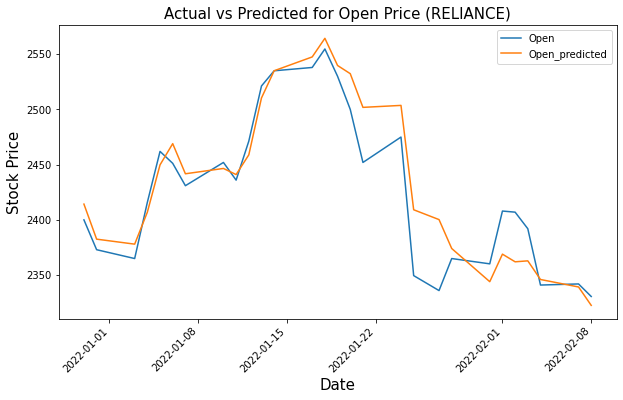

In [ ]:
rel[['Open','Open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for Open Price (RELIANCE)',size=15)
plt.show()

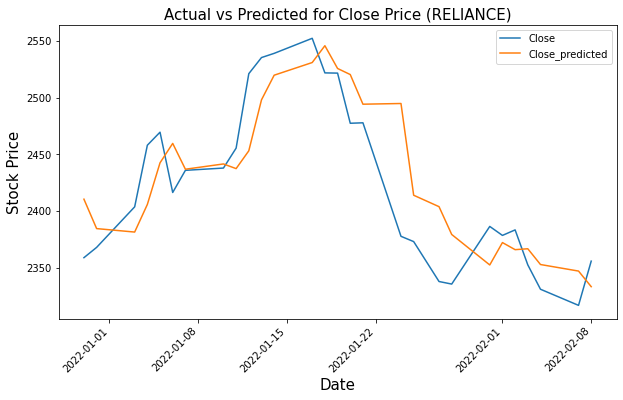

In [ ]:
rel[['Close','Close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for Close Price (RELIANCE)',size=15)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(rel['Open'], rel['Open_predicted'])).round(2)
mape = np.round(np.mean(np.abs(rel['Open']-rel['Open_predicted'])/rel['Open'])*100,2)

tempResults = pd.DataFrame({'Method':['Vanilla LSTM'], 'RMSE': [rmse],'MAPE': [mape] })
tempResults

,Method,RMSE,MAPE
0,Vanilla LSTM,25.78,0.8


In [ ]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(rel['Close'], rel['Close_predicted'])).round(2)
mape = np.round(np.mean(np.abs(rel['Close']-rel['Close_predicted'])/rel['Close'])*100,2)

tempResults = pd.DataFrame({'Method':['Vanilla LSTM'], 'RMSE': [rmse],'MAPE': [mape] })
tempResults

,Method,RMSE,MAPE
0,Vanilla LSTM,39.54,1.3
